In [3]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/Serina/Downloads/GPU_benchmarks_v7.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())


               gpuName  G3Dmark  G2Dmark    price  gpuValue    TDP  \
0  GeForce RTX 3090 Ti    29094     1117  2099.99     13.85  450.0   
1  GeForce RTX 3080 Ti    26887     1031  1199.99     22.41  350.0   
2     GeForce RTX 3090    26395      999  1749.99     15.08  350.0   
3    Radeon RX 6900 XT    25458     1102  1120.31     22.72  300.0   
4     GeForce RTX 3080    24853     1003   999.00     24.88  320.0   

   powerPerformance  testDate category  
0             64.65      2022  Unknown  
1             76.82      2021  Desktop  
2             75.41      2020  Desktop  
3             84.86      2020  Desktop  
4             77.66      2020  Desktop  


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             553 non-null    float64
 4   gpuValue          553 non-null    float64
 5   TDP               692 non-null    float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


In [17]:
df.isnull().sum()


gpuName                0
G3Dmark                0
G2Dmark                0
price               1764
gpuValue            1764
TDP                 1625
powerPerformance    1625
testDate               0
category               0
dtype: int64

In [19]:
df.describe()


,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate
count,2317.000000,2317.000000,553.00000,553.000000,692.000000,692.000000,2317.000000
mean,2046.512732,352.051791,439.74660,10.405515,98.968064,34.103634,2013.956841
std,3758.139908,226.631283,763.59252,10.879097,82.878671,36.604351,3.911129
min,1.000000,7.000000,17.50000,0.000000,4.400000,0.630000,2009.000000
25%,130.000000,171.000000,109.99000,1.690000,35.000000,7.592500,2010.000000
50%,649.000000,307.000000,209.00000,6.580000,75.000000,20.825000,2013.000000
75%,1953.000000,494.000000,435.00000,16.430000,147.000000,49.120000,2017.000000
max,29094.000000,1117.000000,8999.00000,69.730000,500.000000,204.000000,2022.000000


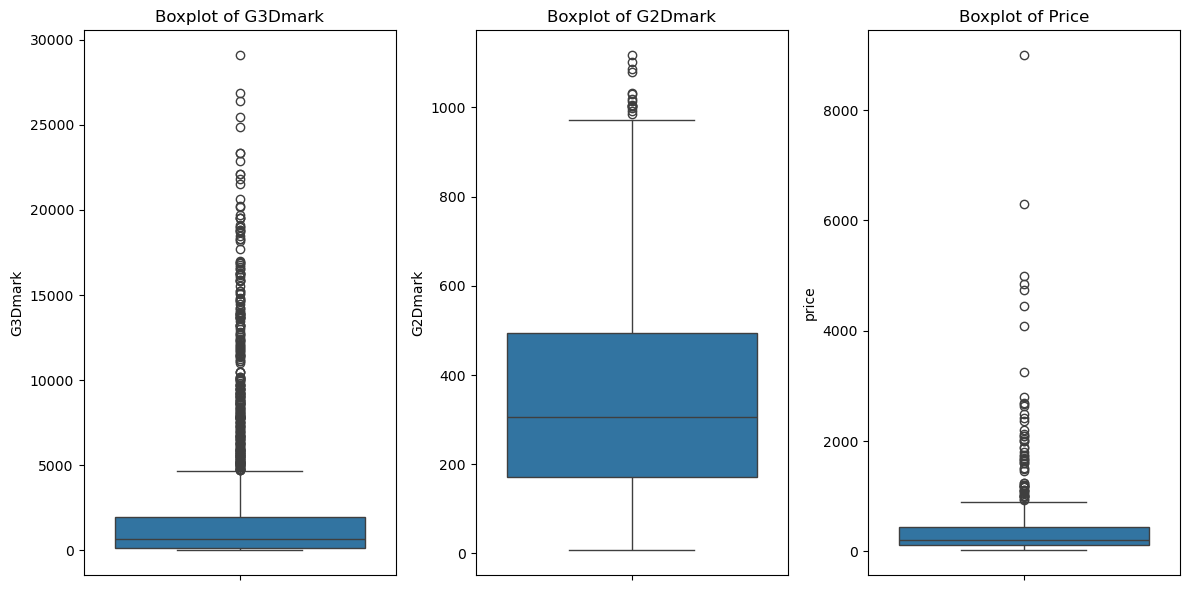

In [5]:
# Plotting boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['G3Dmark'])
plt.title('Boxplot of G3Dmark')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['G2Dmark'])
plt.title('Boxplot of G2Dmark')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['price'])
plt.title('Boxplot of Price')

plt.tight_layout()
plt.show()

In [79]:
percentile_low = df['G3Dmark'].quantile(0.01)
percentile_high = df['G3Dmark'].quantile(0.99)
df_filtered = df[(df['G3Dmark'] > percentile_low) & (df['G3Dmark'] < percentile_high)]

percentile_low = df['G2Dmark'].quantile(0.01)
percentile_high = df['G2Dmark'].quantile(0.99)
df_filtered = df[(df['G2Dmark'] > percentile_low) & (df['G2Dmark'] < percentile_high)]

# percentile_low = df['price'].quantile(0.01)
percentile_high = df['price'].quantile(0.99)
df_filtered = df[(df['price'] > percentile_low) & (df['price'] < percentile_high)]


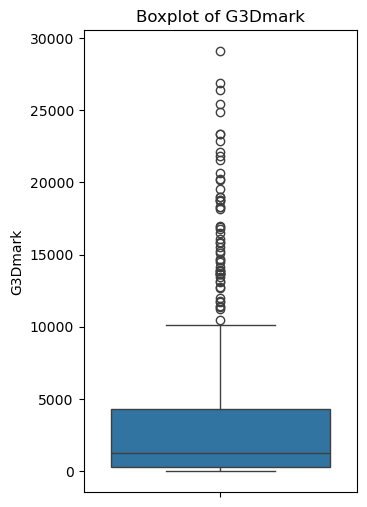

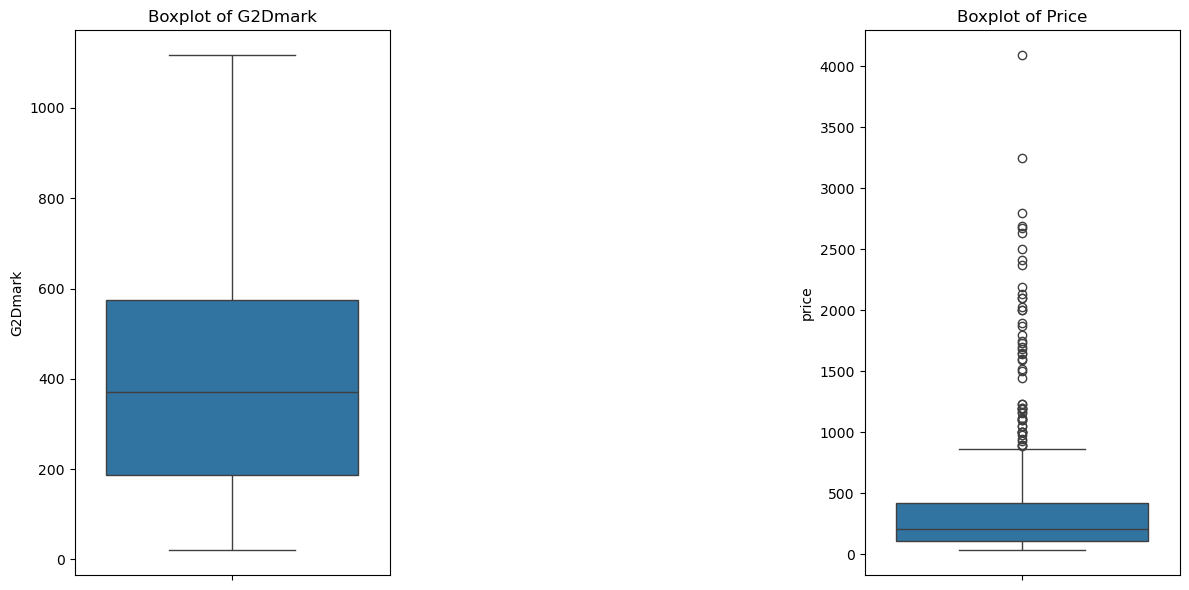

In [81]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df_filtered['G3Dmark'])
plt.title('Boxplot of G3Dmark')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df_filtered['G2Dmark'])
plt.title('Boxplot of G2Dmark')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_filtered['price'])
plt.title('Boxplot of Price')

plt.tight_layout()
plt.show()

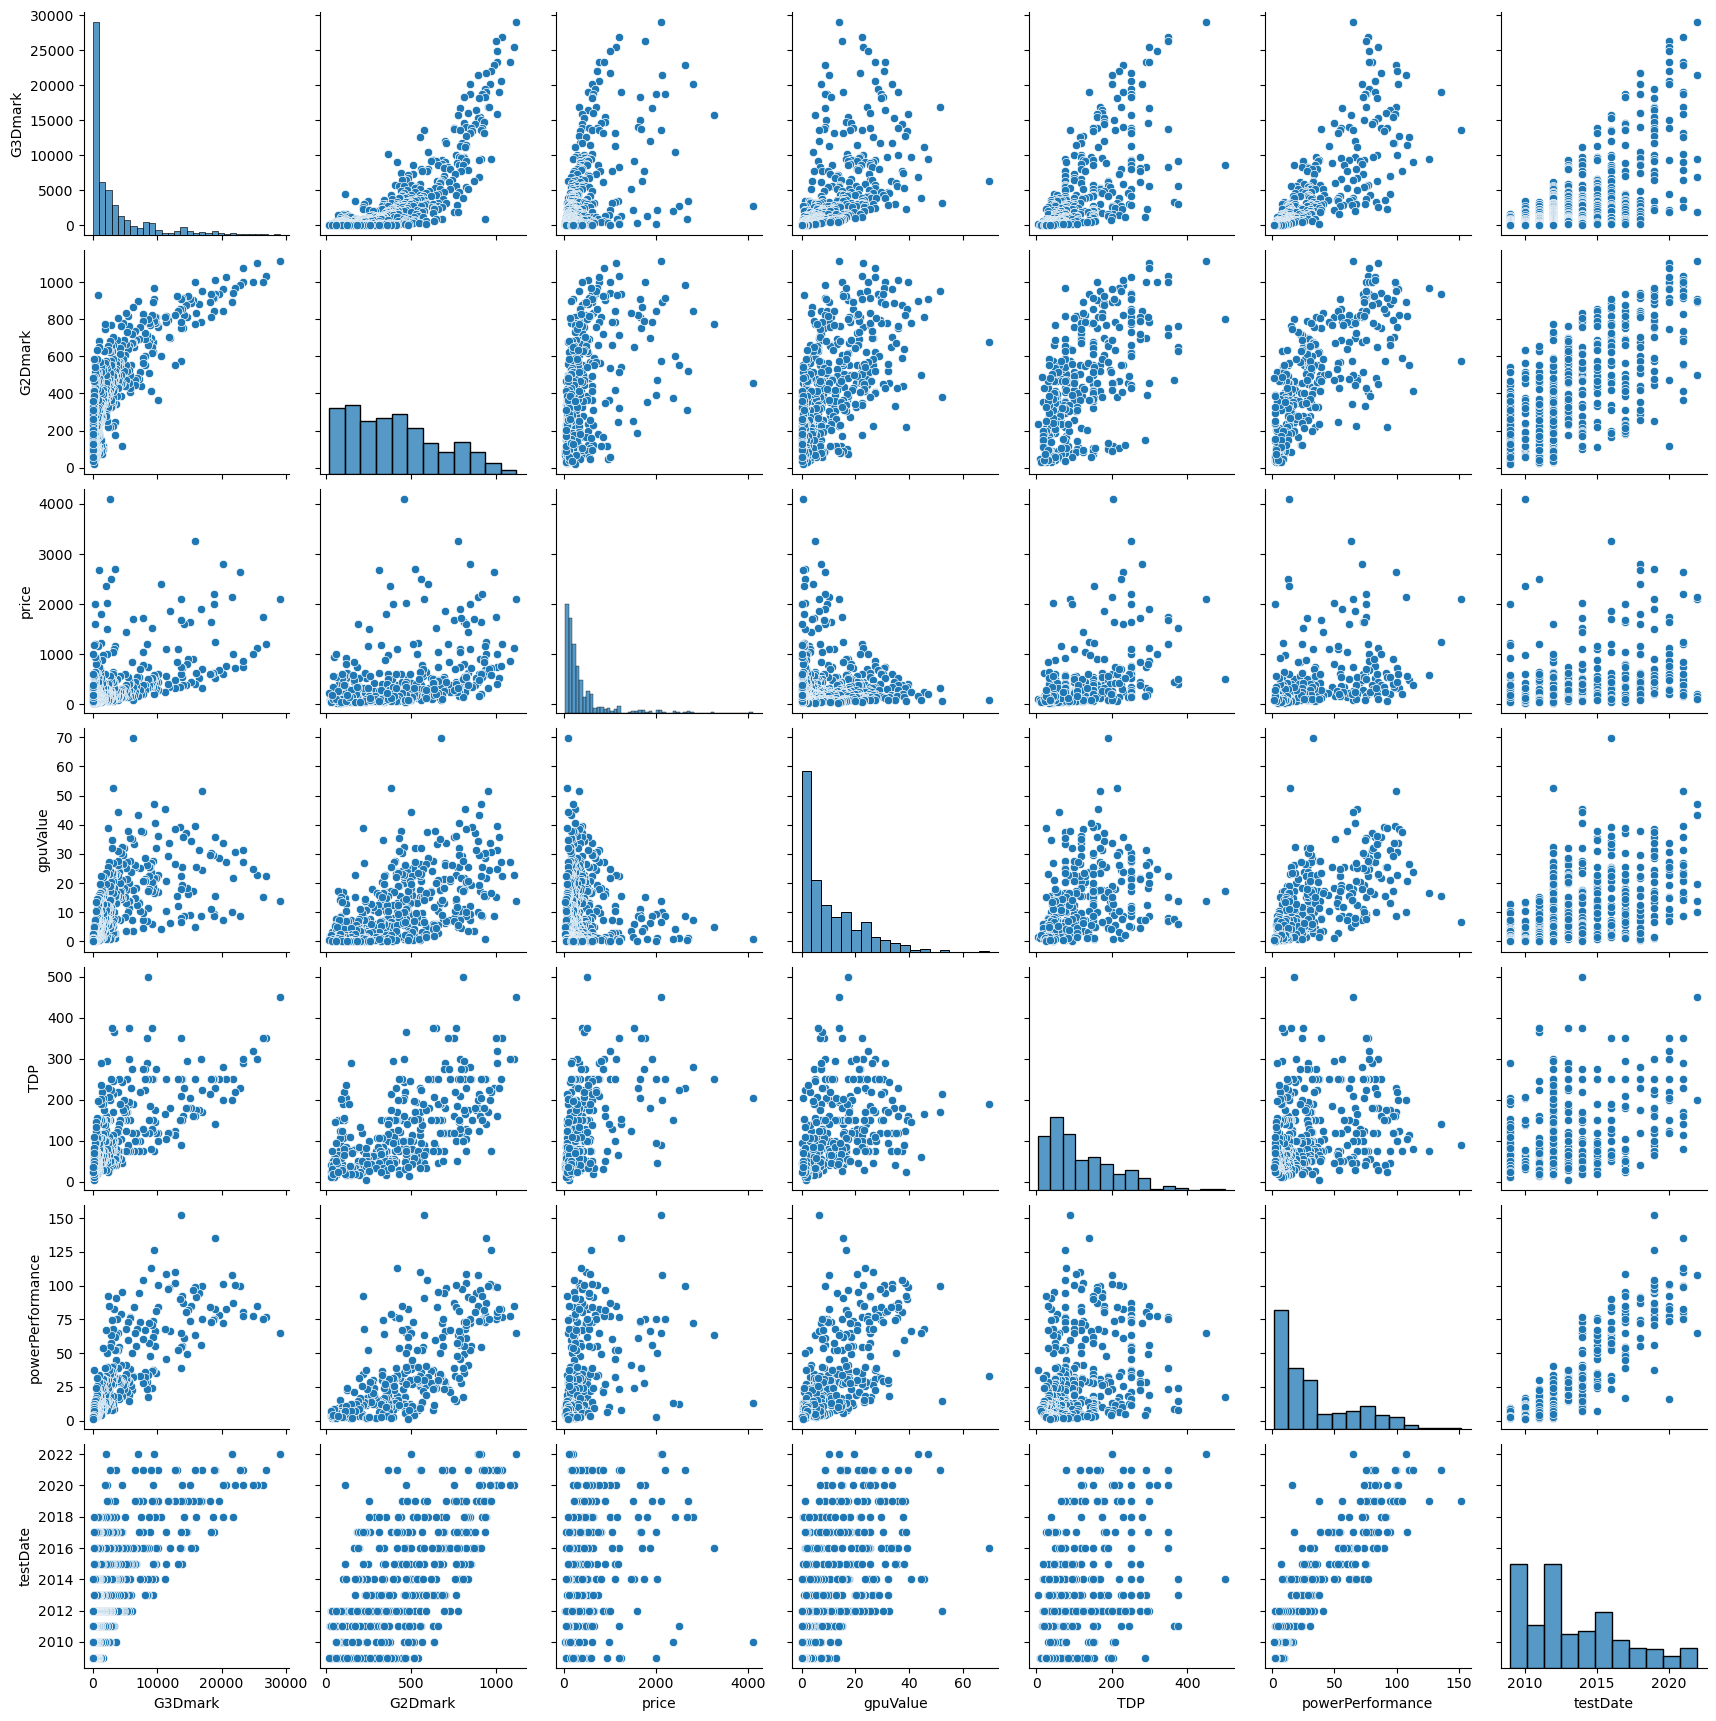

In [31]:
sns.pairplot(df_filtered)

In [83]:
print("Original Dataset Shape:", df_filtered.shape)

# Remove rows with any null values
df_complete = df_filtered.dropna()

# Print the shape of the data after removing nulls
print("New Dataset Shape after removing nulls:", df_complete.shape)

# Optionally, save the cleaned dataset to a new file
df_complete.to_csv('/Users/Serina/Downloads/GPU_benchmarks_cleaned.csv', index=False)

print("Data with nulls removed has been saved.")

Original Dataset Shape: (539, 9)
New Dataset Shape after removing nulls: (380, 9)
Data with nulls removed has been saved.


In [103]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 1987
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           380 non-null    object 
 1   G3Dmark           380 non-null    int64  
 2   G2Dmark           380 non-null    int64  
 3   price             380 non-null    float64
 4   gpuValue          380 non-null    float64
 5   TDP               380 non-null    float64
 6   powerPerformance  380 non-null    float64
 7   testDate          380 non-null    int64  
 8   category          380 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 29.7+ KB


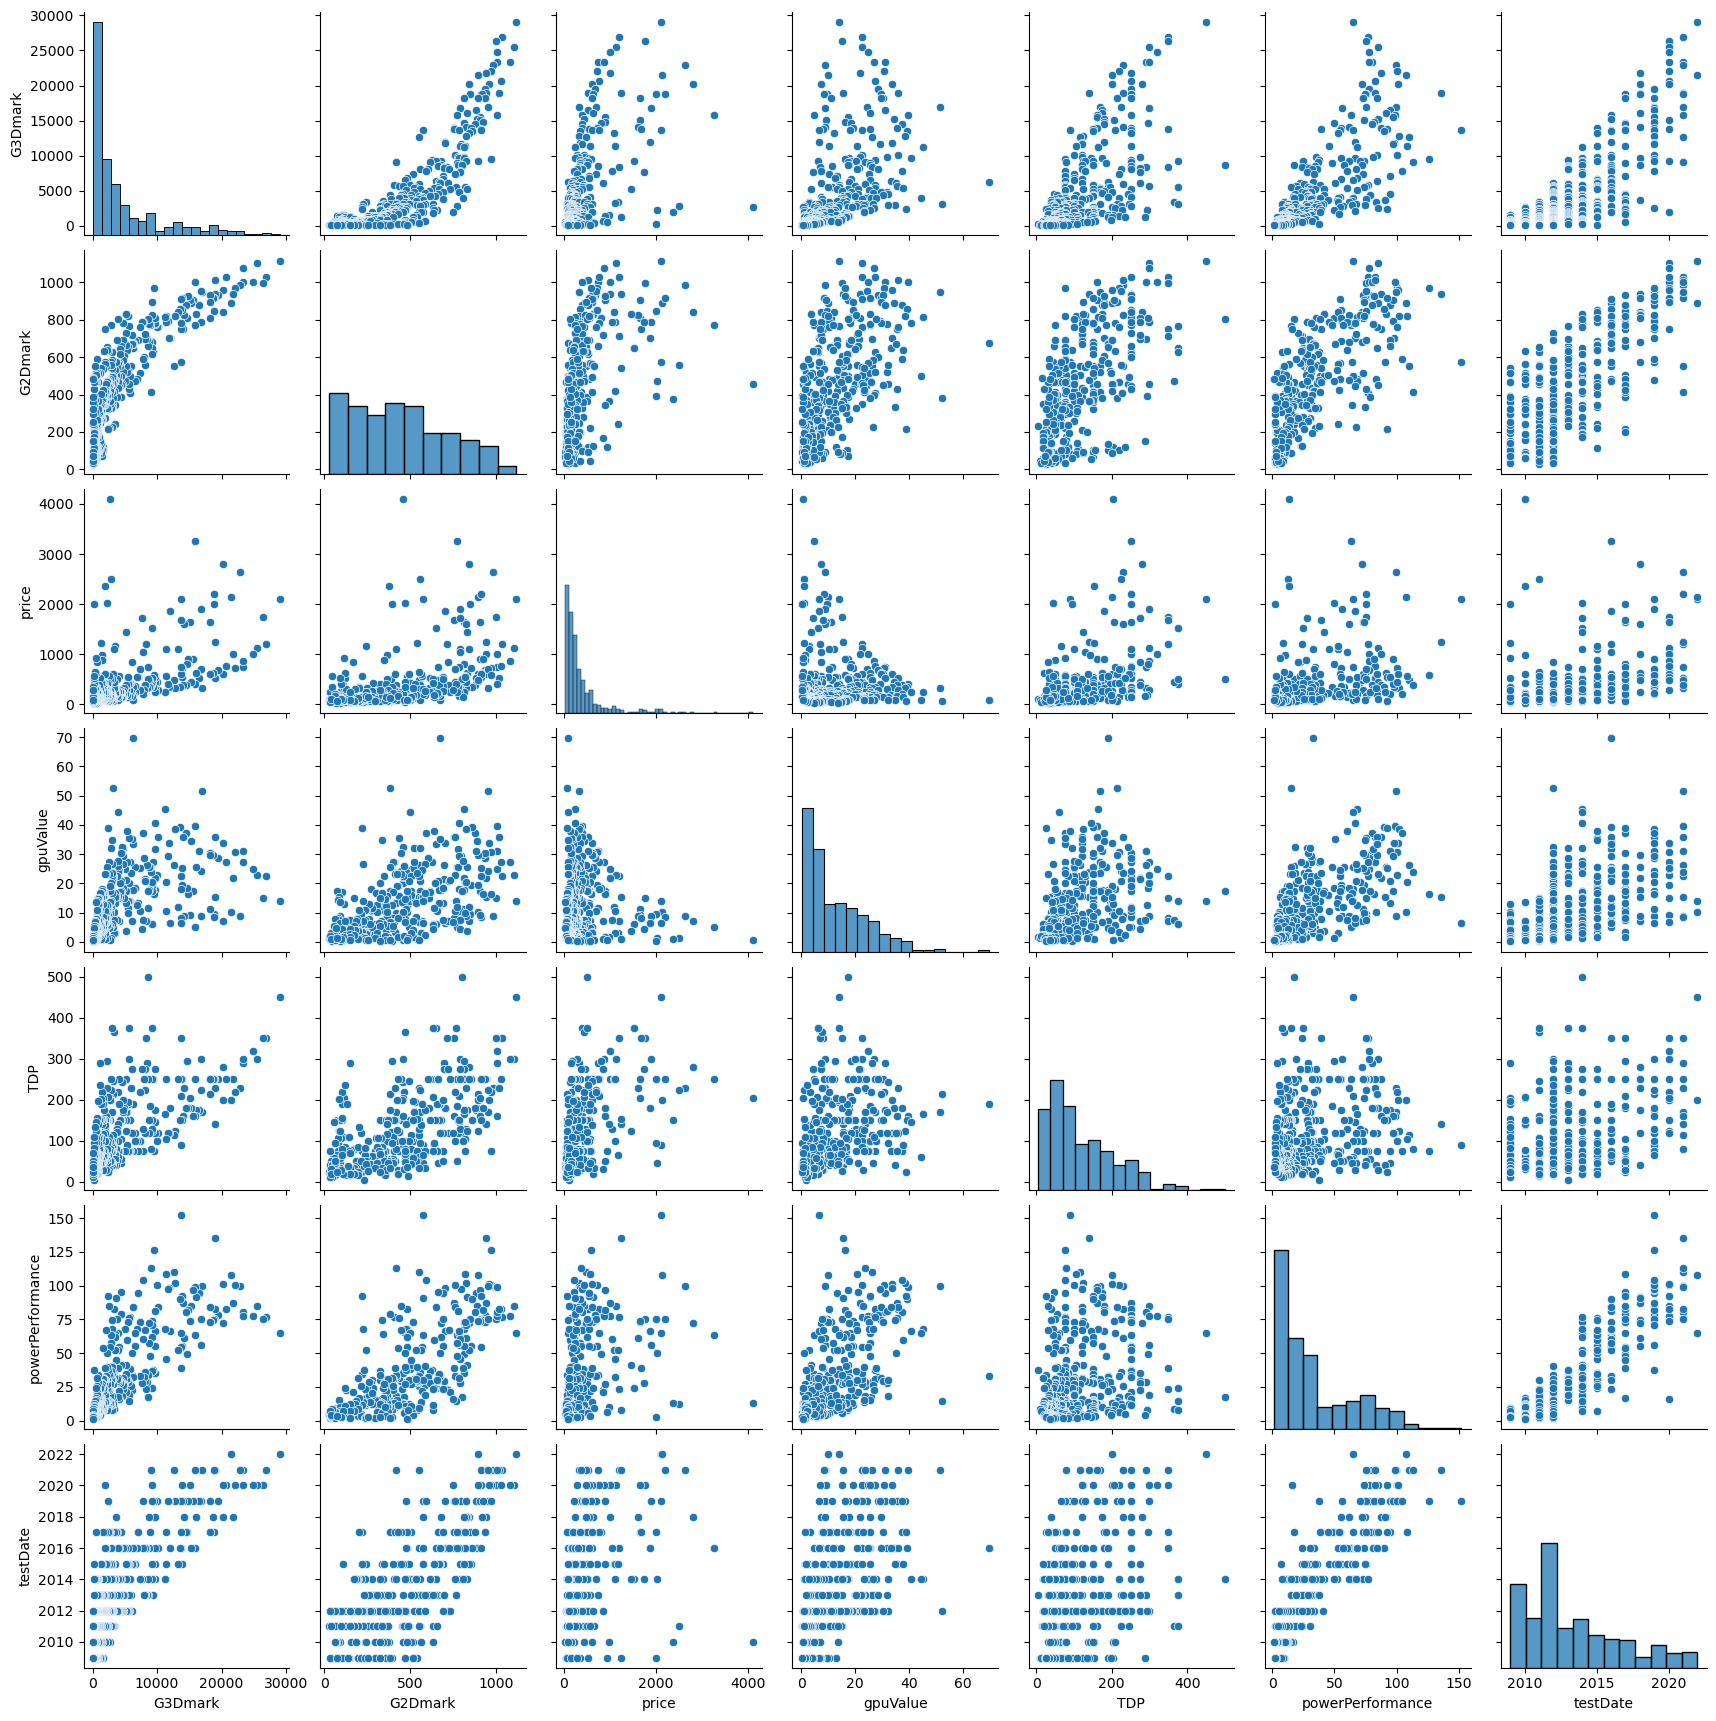

In [85]:
sns.pairplot(df_complete)

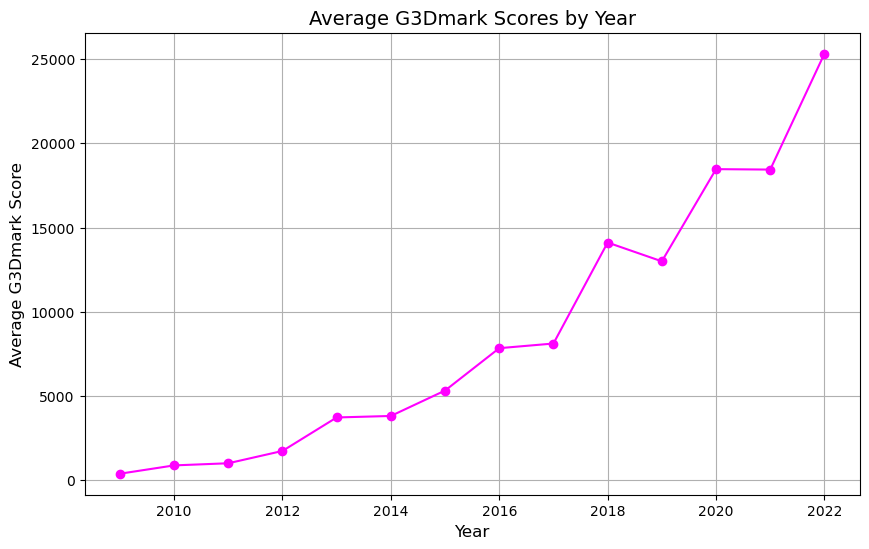

In [87]:
yearly_avg_performance = df_complete.groupby('testDate')['G3Dmark'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_performance.index, yearly_avg_performance.values, marker='o', linestyle='-', color='magenta')
plt.title('Average G3Dmark Scores by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average G3Dmark Score', fontsize=12)
plt.grid(True)
plt.show()

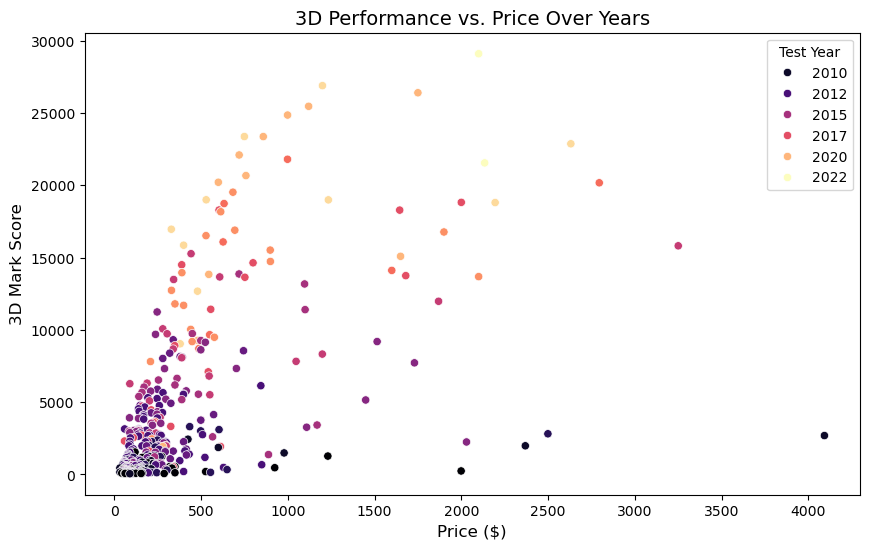

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='G3Dmark', hue='testDate', palette='magma', data=df_complete)
plt.title('3D Performance vs. Price Over Years', fontsize=14)
plt.ylabel('3D Mark Score', fontsize=12)
plt.xlabel('Price ($)', fontsize=12)
plt.legend(title='Test Year')
plt.show()


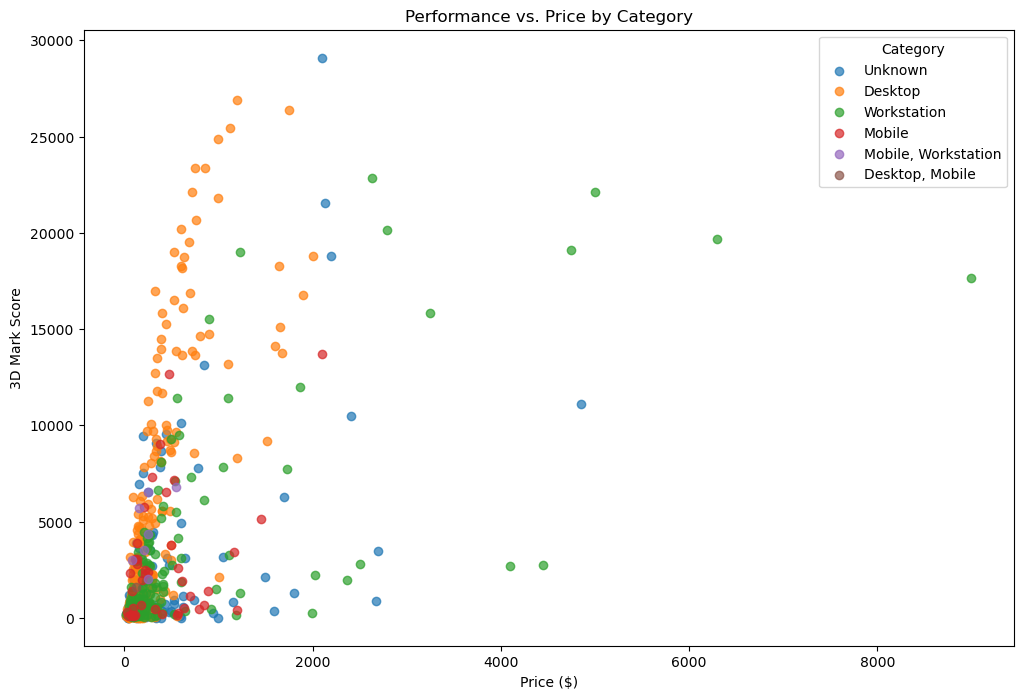

In [101]:
plt.figure(figsize=(12, 8))
for category in df['category'].unique():
    subset = df[df['category'] == category]
    plt.scatter(subset['price'], subset['G3Dmark'], label=category, alpha=0.7)
plt.title('Performance vs. Price by Category')
plt.xlabel('Price ($)')
plt.ylabel('3D Mark Score')
plt.legend(title='Category')
plt.show()
